## Online Electronic Sales Analysis with Python

<img src="https://www.ionos.co.uk/digitalguide/fileadmin/DigitalGuide/Teaser/online-shopping-t.jpg" width="700" align="center" />

Hello again, today we'll be looking at sales dataset analysis which may be relatable to a lot of you folks. <br>
As always, I'll make the notebook with carefully planned out steps and explanations as well. My goal is so that everyone can understand and follow along on this journey! Even to those with no analytics experience whatsoever.<br>
Instead of going on blindly, we'll stick to 5 business questions:<br>
1. What month has the highest sales? And how much money was earned? <br>
2. What city had the highest sales revenue?<br>
3. What is the ideal time of the day (or time range) to push advertisements?<br>
4. What are the most often 'sold together' products?<br>
5. What's the top selling product? And why?<br>
Without further ado, let's start!

Disclaimer : if you notice that the the lines of code don't seem somewhat the most efficient, that's because I wanted to showcase my knowledge of handling problems in different ways, just so you know!

#### 1. Setting up the environment and the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#### 2. Reading up a single data file

In [14]:
# Sales_April_2019.csv is the first file out of many, let's take a look to see what the data offers!
df = pd.read_csv("D:\Data Science Project\Portfolio Project\Python\Pandas\SalesAnalysis\Sales_Data\Sales_April_2019.csv")
df.head(10)
# Look! there is NaN values, which means the data needs some cleaning down the road

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


In [15]:
# Just curious, let's see how many rows and columns are there in this particular file
print(df.shape)

(18383, 6)


What this means? 18383 rows of data with 6 columns/features. <br>

#### 3. Merging multiple sales data files into a single csv (concatenating)

First let's write a loop code that allows us to get all names of the files.

In [16]:
files = [file for file in os.listdir('D:\Data Science Project\Portfolio Project\Python\Pandas\SalesAnalysis\Sales_Data')]
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


We can see that there are 12 files or a whole year worth of sales data! Now to concatenate (add all these files) into a single file.

In [17]:
# Setting our whole_data variable as a pandas dataframe
year_data = pd.DataFrame()

# Same concept, but to append (add) all the rows of data of all files into a single file
for file in files:
    df = pd.read_csv("D:/Data Science Project/Portfolio Project/Python/Pandas/SalesAnalysis/Sales_Data/" + file)
    year_data = pd.concat([year_data, df])
    
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [42]:
# Checking rows and columns of our combined data
year_data.shape

(186850, 6)

Remember that previously there were 18383 rows of data. Now it's nearly 190000 rows of data, meaning our merging attempt was successful! <br>
Finally let's save the this merged data to a csv, just for a backup.

In [20]:
# Saving the merged data, and utilize just that data, is highly preferred 
# As it's much simpler than having to deal with 12 files of csv (basically preventing any error or extra appending, if we run the codes again)
year_data.to_csv('Year_Data.csv', index = False)

Now we just assign 'sales_df' for loading up the previously Year_Data (the naming can be anything you desire).

In [3]:
# Reading up the updated, merged file!
sales_df = pd.read_csv("D:\Data Science Project\Portfolio Project\Python\Pandas\SalesAnalysis\Sales_Data\Year_Data.csv")
sales_df.head()
# There it is, ready for further action

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### 4. Cleaning and tidying up the data

Don't you wish all the data you work with has no null values, has the correct data types, etc. Well until that faithful day comes, we have to clean it up ourselves. <br>

##### 4.1. Finding rows with nulls (NaN) and dropping it

In [4]:
# Let's start with filtering the data to see rows with at least one NaN value
null_df = sales_df[sales_df.isna().any(axis = 1)]
null_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Checking the null_df total of rows & columns
null_df.shape

(545, 6)

In [6]:
# To verify, there is also another way
sales_df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

It can be seen that for every row that contains a null, basically has the whole other columns with nulls too. So, simply just rows of totally empty data

In [7]:
# Now to drop/delete rows that contains ALL null values in every column
sales_df = sales_df.dropna(how = 'all')
sales_df.shape
# Remember that the initial rows were 186850, minus 545 null rows equals:

(186305, 6)

Our newly cleaned data of null values has 186305 rows, let's move on!

##### 4.2. Dropping duplicates

Before I made this script, in my initial analysis, I encountered an error that says there are words 'Or' in the Order Date column. So I did an investigation to see what that's all about.

In [8]:
# Making a temporary sales_df so I don't screw up the original sales_df
temp_df = sales_df[sales_df['Order Date'].str[0:2] == 'Or']
temp_df.shape

(355, 6)

Right on, we can see there are many duplicates. That temp_df shows all rows containing duplicates of each columns' name into the row itself!
Let's drop ALL duplicates which may lurk in the data. Not just the ones we saw before, but also the actual sales data that may be duplicated too.

In [9]:
# Dropping all duplicates in the data
sales_df = sales_df.drop_duplicates()
sales_df.shape

(185687, 6)

Now one thing to note on dropping duplicates, is it eliminates duplicates only, meaning there is still one row containing: [Order ID, Product, Quantity Ordered, Price Each, Order Date, Purchase Address]<br>
We don't want ANY of that, so let's try dropping this unwanted row

In [10]:
# Here's what I meant, there is still one row of this unnecessary, non-sales row of data
sales_df[sales_df['Order Date'].str[0:2] == 'Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [11]:
# Dropping the unwanted row, conditional row dropping ('!=' is an operator meaning 'not equal to')
sales_df = sales_df[sales_df['Order Date'] != 'Order Date']
sales_df.shape

(185686, 6)

Well, our previous null-free data has 186305 rows, minus 185686 equals 619 rows (duplicates and a single unwanted row) that have been dropped!

##### 4.3. Adding additional columns and changing data types

Let's start with adding a month column

In [12]:
# Adding the column 'Month' and filling the column with the first two strings out of 'Order Date' column
sales_df['Month'] = sales_df['Order Date'].str[0:2]

# While we're here let's change the 'Month' data type to integer (round numbers, no commas)
sales_df['Month'] = sales_df['Month'].astype('int32')
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


Checking and changing data types of each column is crucial for further calculations or analysis

In [13]:
# Checking what other columns' data types are
sales_df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

Now let's change 'Order ID' and 'Quantity Ordered' to integers (round numbers), while 'Price Each' will be floats (numbers with commas)

In [14]:
# Changing the rest of columns' data types
# To integers
int_cols = ['Order ID', 'Quantity Ordered'] 
sales_df[int_cols] = sales_df[int_cols].astype('int32') 

# To floats
sales_df['Price Each'] = sales_df['Price Each'].astype('float64')
sales_df.dtypes

Order ID              int32
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

We can also use the pandas pd.to_numeric() function, this does the job as well, maybe in the future. <br>
I guess we're ready for the analysis, other modifications or column additions will be done when we need it.

#### 5. Answering business questions out of our data

This data was generated by an e-commerce platform (in which its actual name isn't made public) where it has been modified heavily to just include several products and columns. All of which are electronics. To give you an idea, here's all the products listed in this dataset.

In [15]:
# Bringing up all the products in sales_df
sales_df['Product'].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

#### 5.1. What month has the highest sales? And how much money was earned?

The month, date, year, and even the purchasing time is there. But we need to separate those into different individual columns!

In [16]:
# Let's add 'Sales' column which contains 'Quantity Ordered' * 'Price Each'
sales_df['Sales'] = sales_df['Quantity Ordered'] * sales_df['Price Each']
# Assigning a new dataframe named 'sales_monthly_df'
sales_monthly_df = sales_df.groupby(['Month']).sum()
sales_monthly_df[['Quantity Ordered','Sales']]

,Quantity Ordered,Sales
Month,,
1,10893,1821413.16
2,13431,2200078.08
3,16979,2804973.35
4,20536,3389217.98
5,18653,3150616.23
6,15234,2576280.15
7,16054,2646461.32
8,13429,2241083.37
9,13091,2094465.69


So, the answer is December with more than 4.6 million US$ (American data, American currency), with the lowest earning month being January with approximately 1.8 million USD.<br>
But another way to better understand and grasp what the data says as a whole, is through visualizations. Bar charts are seemingly a good way for this case, let's try that!

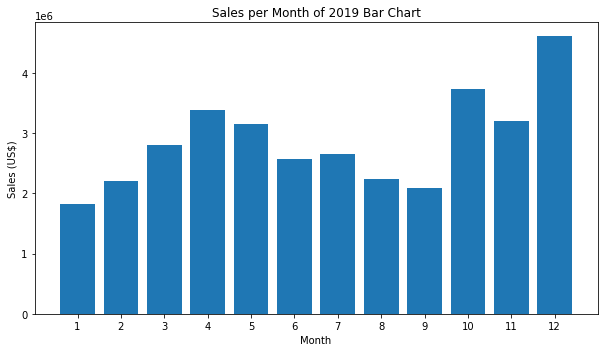

In [17]:
# Creating bar chart of total sales per month from the data
months = range(1,13)
plt.rcParams["figure.figsize"] = [8.5, 5]
plt.rcParams["figure.autolayout"] = True
plt.bar(months, sales_df.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.title('Sales per Month of 2019 Bar Chart')
plt.xlabel('Month')
plt.ylabel('Sales (US$)')
plt.show()

Now, you can definitely see the sales revenue throughout the months much easier.<br>
From this question only, we can expand our analysis to many more questions and findings. For example:<br>
-What is the best selling product of each month?<br>
-What category of electronics are sold most at every month (headphones, smartphones, cables, etc)?<br>
-Is there a correlation between each electronic's category sales and the months?<br>
And that's not even touching the weekly time frame analysis, so much to answer yet so little time on our hands.<br><br>
Moving on..

#### 5.2. What city had the highest sales revenue?

The sales_df hasn't got a separate city column, let's make that.

In [18]:
# Adding a city column, using .apply() function
sales_df['City'] = sales_df['Purchase Address'].apply(lambda x: x.split(',')[1]) 
# If you're confused at this, try googling lambda and .split usage in python
sales_df[['Purchase Address','City']].head()

,Purchase Address,City
0,"917 1st St, Dallas, TX 75001",Dallas
2,"682 Chestnut St, Boston, MA 02215",Boston
3,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
5,"333 8th St, Los Angeles, CA 90001",Los Angeles


There is also another way to do this, using .apply() and custom made functions. Let's try that.

In [19]:
# Creating functions to get city and state
def get_city(purchase_address):
    return purchase_address.split(',')[1]
def get_state(purchase_address):
    return purchase_address.split(',')[2].split(' ')[1]

# Applying the functions to a new 'City (State)' column
sales_df['City (State)'] = sales_df['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')
sales_df[['Purchase Address', 'City (State)']].head()

,Purchase Address,City (State)
0,"917 1st St, Dallas, TX 75001",Dallas (TX)
2,"682 Chestnut St, Boston, MA 02215",Boston (MA)
3,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
5,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA)


Wonderful, which columns do you like better? 'City' or 'City (State)'? <br>
Doesn't matter really, we can use either one or both anytime we want. <br>
Now, to answer the question in hand.

In [20]:
# Same principle as the previous question, but we'll use the 'City (State)'
sales_df.groupby(['City (State)']).sum()
# Now, for table viewing, let's sort the 'Sales' values descendingly
sales_df.groupby(['City (State)']).sum().sort_values(by = 'Sales', ascending = False)

,Order ID,Quantity Ordered,Price Each,Month,Sales
City (State),,,,,
San Francisco (CA),1.028721e+10,50169,8204001.38,314949,8254743.55
Los Angeles (CA),6.801454e+09,33247,5417171.70,208020,5448304.28
New York City (NY),5.729940e+09,27903,4632920.54,175557,4661867.14
Boston (MA),4.590961e+09,22494,3634398.40,140898,3658627.65
Atlanta (GA),3.419485e+09,16584,2778608.69,104649,2794199.07
Dallas (TX),3.410206e+09,16707,2750026.38,104447,2765373.96
Seattle (WA),3.402481e+09,16534,2730586.55,104817,2745046.02
Portland (OR),2.302544e+09,11291,1859836.44,70517,1870010.56
Austin (TX),2.277506e+09,11137,1808340.03,69720,1818044.33


So the city with the highest sales revenue is San Fransisco, followed with Los Angeles and New York City.<br>
But it's difficult to imagine the numbers' comparison, that's where the visualization comes in.

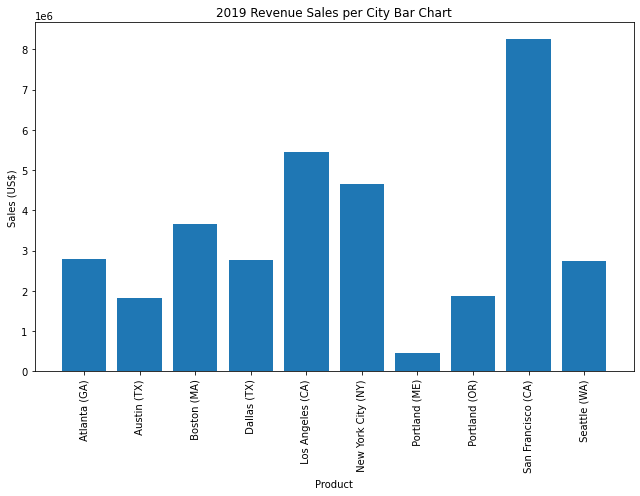

In [21]:
# Creating bar chart of total sales per city 
cities = [city for city, df in sales_df.groupby(['City (State)'])]
plt.rcParams["figure.figsize"] = [9, 7]
plt.rcParams["figure.autolayout"] = True
plt.bar(cities, sales_df.groupby(['City (State)']).sum()['Sales'])
plt.xticks(cities, rotation = 'vertical', size = 10)
plt.title('2019 Revenue Sales per City Bar Chart')
plt.xlabel('Product')
plt.ylabel('Sales (US$)')
plt.show()

One extra thought, I strongly believe that the city size and population greatly affects the sales sum. It makes perfect sense, though we have to analyze it further to figure out how strong the correlation is. <br>
Again, we can expand our exploration and data digging further just from this question. But for now, let's leave it as it is.

#### 5.3. Based on the 2019 data, what is the ideal time of the day (or time range) to push advertisements?

This question's interesting, when should we display our advertisements of our service and products to maximize the likelihood of customers buying products?

First of all, let's add 'Hour', 'Minute', and 'Count' to the columns. The 'Count' will be filled with value of 1, useful for when we want to sum or aggregate the sales count in a specified period of time, for example; In Dallas (TX), the average sales in the (6 - 12) PM time range is 200 daily, considerably higher compared to the rest of the day. You get the idea.

In [22]:
# Adding 'Order Date (Converted)' column, basically changing the data type to datetime format
sales_df['Order Date (Converted)'] = pd.to_datetime(sales_df['Order Date'])
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,City (State),Order Date (Converted)
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,Dallas (TX),2019-04-19 08:46:00
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Boston (MA),2019-04-07 22:30:00
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles (CA),2019-04-12 14:38:00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles (CA),2019-04-12 14:38:00
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles (CA),2019-04-30 09:27:00


In [23]:
# Notice the newest column, now we just extract the hour and minute to new columns
sales_df['Hour'] = sales_df['Order Date (Converted)'].dt.hour
sales_df['Minute'] = sales_df['Order Date (Converted)'].dt.minute
sales_df['Count'] = 1
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,City (State),Order Date (Converted),Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,Dallas (TX),2019-04-19 08:46:00,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Boston (MA),2019-04-07 22:30:00,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles (CA),2019-04-12 14:38:00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles (CA),2019-04-12 14:38:00,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles (CA),2019-04-30 09:27:00,9,27,1


There it is, new columns containing individual data. In this case from datetime to hour, minute, and count (for counting/analysis purpose of course). <br>
We can't answer the question just from looking at the table, let's make a line plot graph to see total sales based on the 24 hour frametime.

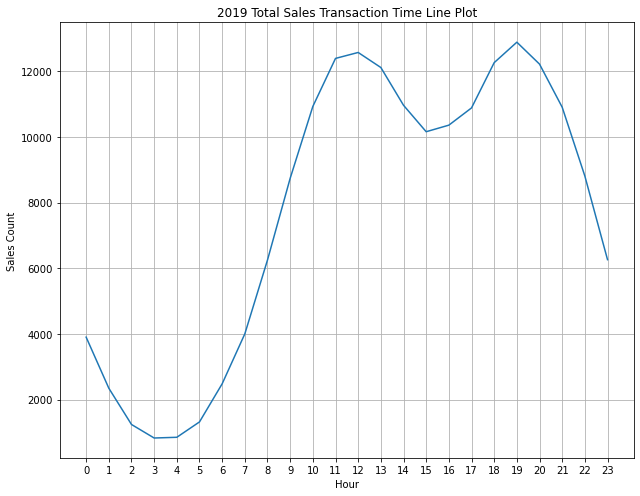

In [24]:
# Setting up the line plot, basically a copy paste from the previous visualization with modifications
hour_time = [pair for pair, df in sales_df.groupby(['Hour'])]
plt.rcParams["figure.figsize"] = [9, 7]
plt.rcParams["figure.autolayout"] = True
plt.plot(hour_time, sales_df.groupby(['Hour']).count()['Count'])
plt.xticks(hour_time)
plt.title('2019 Total Sales Transaction Time Line Plot')
plt.xlabel('Hour')
plt.ylabel('Sales Count')
plt.grid()
plt.show()

There, we can decide what time frame we should use to display our ads. Personally, I'd consider 10 AM and 6 PM to push the ads. <br>
We also have to remember, the Sales Count is number of total sales in every 1 hour increment from the WHOLE year data and all cities. We might want to dig in on how the time focused buying trend differ from one month to another. Heck, I'm sure every city's active buying time will also be different, at different level of margins.

#### 5.4. What are the most often 'sold together' products? 

Before we jump right to answer the question, you need to understand this:

In [25]:
# Showing rows of data with duplicated 'Order ID'
duplicate_order_id_df = sales_df[sales_df['Order ID'].duplicated(keep = False)] # Stupid long naming, but just so everyone can understand
duplicate_order_id_df[['Order ID','Product', 'Quantity Ordered']]

,Order ID,Product,Quantity Ordered
3,176560,Google Phone,1
4,176560,Wired Headphones,1
18,176574,Google Phone,1
19,176574,USB-C Charging Cable,1
32,176586,AAA Batteries (4-pack),2
...,...,...,...
186792,259303,AA Batteries (4-pack),1
186803,259314,Wired Headphones,1
186804,259314,AAA Batteries (4-pack),2
186841,259350,Google Phone,1


What this means? Well every row displays only a specific product sold (and how many), while Order ID meaning the reference ID of every transaction. Every transaction can have 1 or more products sold. <br>
So for duplicated Order IDs, it isn't a mistake, as it just so happens that the data lists every row containing a single product sold only.

In [26]:
# Combining products sold together based on the Order ID to a new dataframe
duplicate_order_id_df['Product Combo'] = duplicate_order_id_df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
most_sold_pair_df = duplicate_order_id_df[['Order ID', 'Product Combo']].drop_duplicates()
most_sold_pair_df

C:\Users\edric\AppData\Local\Temp\ipykernel_9776\983226646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate_order_id_df['Product Combo'] = duplicate_order_id_df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


,Order ID,Product Combo
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"
129,176681,"Apple Airpods Headphones, ThinkPad Laptop"
...,...,...
186761,259277,"iPhone, Wired Headphones"
186783,259297,"iPhone, Lightning Charging Cable"
186791,259303,"34in Ultrawide Monitor, AA Batteries (4-pack)"
186803,259314,"Wired Headphones, AAA Batteries (4-pack)"


First let's find the top pair combinations of products sold:

In [27]:
# Trying to count different combinations of products and listing out the most common one
from itertools import combinations
from collections import Counter

count = Counter()
for row in most_sold_pair_df['Product Combo']:
    row_reference = row.split(', ')
    count.update(Counter(combinations(row_reference, 2)))

for id, content in count.most_common(10):
    print(id, content)

('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


That was the ten most sold pairings sold, what about triplets? What are the top ten most sold 3 products combination?

In [28]:
# The same as before, but with 3 different products purchased together
count = Counter()
for row in most_sold_pair_df['Product Combo']:
    row_reference = row.split(', ')
    count.update(Counter(combinations(row_reference, 3))) # The difference only in the number of combinations function

for id, content in count.most_common(10):
    print(id, content)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 86
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


And those are ten most sold combinations of 3 products.<br>
We can increase the total product combination, but from my own finding there is nothing above 5 combination of products.

Honestly to answer this question, it took longer than I'd like to admit to come up with a working solution. But, a part of being a good programmer or data analyst is to be good at googling your specific needs online. Be it from googling, stack overflow, youtube tutorials, various online forums, and more.. all those are helpful.<br>
But mostly stack overflow, now that's the big one. BIG

#### 5.5. What's the top selling product? And why?

By now, you should be able to predict my next move. That's right, we'll begin by rounding the data up based on its product. Let's jump straight to plotting graphs.

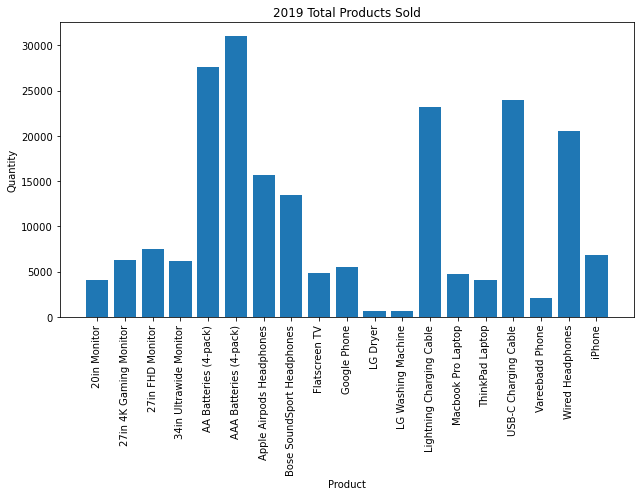

In [31]:
# Let's start by creating a simple bar graph
grouped_products = sales_df.groupby('Product')
ordered_quants = grouped_products.sum()['Quantity Ordered']

keys = [link for link, sales_df in grouped_products]
plt.bar(keys, ordered_quants)
plt.xticks(keys, rotation = 'vertical', size = 10)
plt.title('2019 Total Products Sold')
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.show()

Now we can see that two of the most sold products are the batteries packs, followed with the charging cables. Now, why is that? <br>
At the very first I came up with a simple hypothesis that the cheaper the product is, the more likely it is to be sold in great quantities. As sure as I am with my theory, it's still that, a hypothesis. One must always test his hypothesis to verify its accuracy.

C:\Users\edric\AppData\Local\Temp\ipykernel_9776\748614207.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation = 'vertical', size = 10)


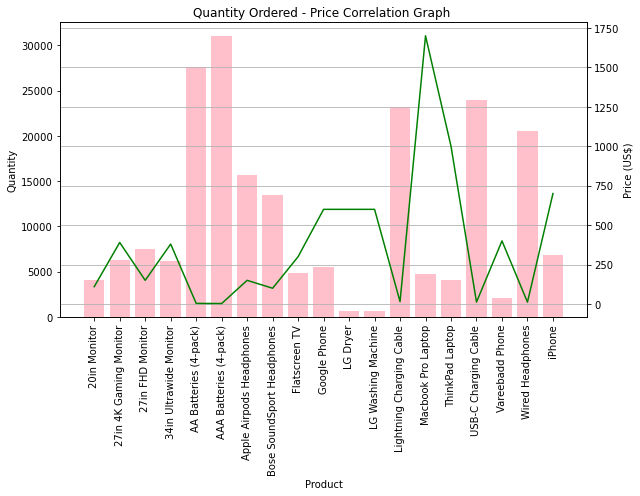

In [38]:
# Now, to test my hypothesis, we have to also input the price of products in the same graph
individual_prices = sales_df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, ordered_quants, color = 'pink')
ax2.plot(keys, individual_prices, color = 'green')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity')
ax2.set_ylabel('Price (US$)')
ax1.set_xticklabels(keys, rotation = 'vertical', size = 10)
plt.grid()
plt.title('Quantity Ordered - Price Correlation Graph ')
plt.show()

So basically my hypothesis would generate a graph that's high in quantity, and low in price, and vice-versa. Looking at the graph, I believe I was correct. But as significant as the price factor could be, we all know that's not the only thing that could generate high sales, don't we? <br>
Notice that the Macbook Pro Laptop sales is higher than the ThinkPad Laptop, even though the latter's price is much lower. That means that while it is true that price can greatly affect the sales quantity, other factors also come into play in figuring out what makes a high selling product. For starters, Apple is arguably the most popular electronic brand in the world, so branding definitely counts. Also there are a lot of utilities that use batteries, which means a high demand of batteries packs. And there is much more that we can dig into, but I believe for now, the graph serves my hypothesis well with evidence.

<br>
That's about it, I have to say that it was an adventure and challenging to make this notebook, even for a simple exploration and analysis like this one. I apologize if there is any typo or misspelling, or even there are things you may not agree with. Keep in mind I made this in my free time or more technically, late nights (not really a good idea I know).<br>
But the main purpose of this notebook is to showcase my data wrangling skills, my problem solving ability, my general thought process and logic. I could make this notebook much shorter in length, but I also wanted all people to be able to understand what I'm doing, so it's a good practice for my communication skill too.

Until next time, sayonara and Godspeed!<br><br>

| Date (DD-MM-YYYY) | Author                             |
| ----------------- | ---------------------------------- |
| 10-11-2022        | Edricnes                           |
